# James Webb Space Telescope model (to scale)

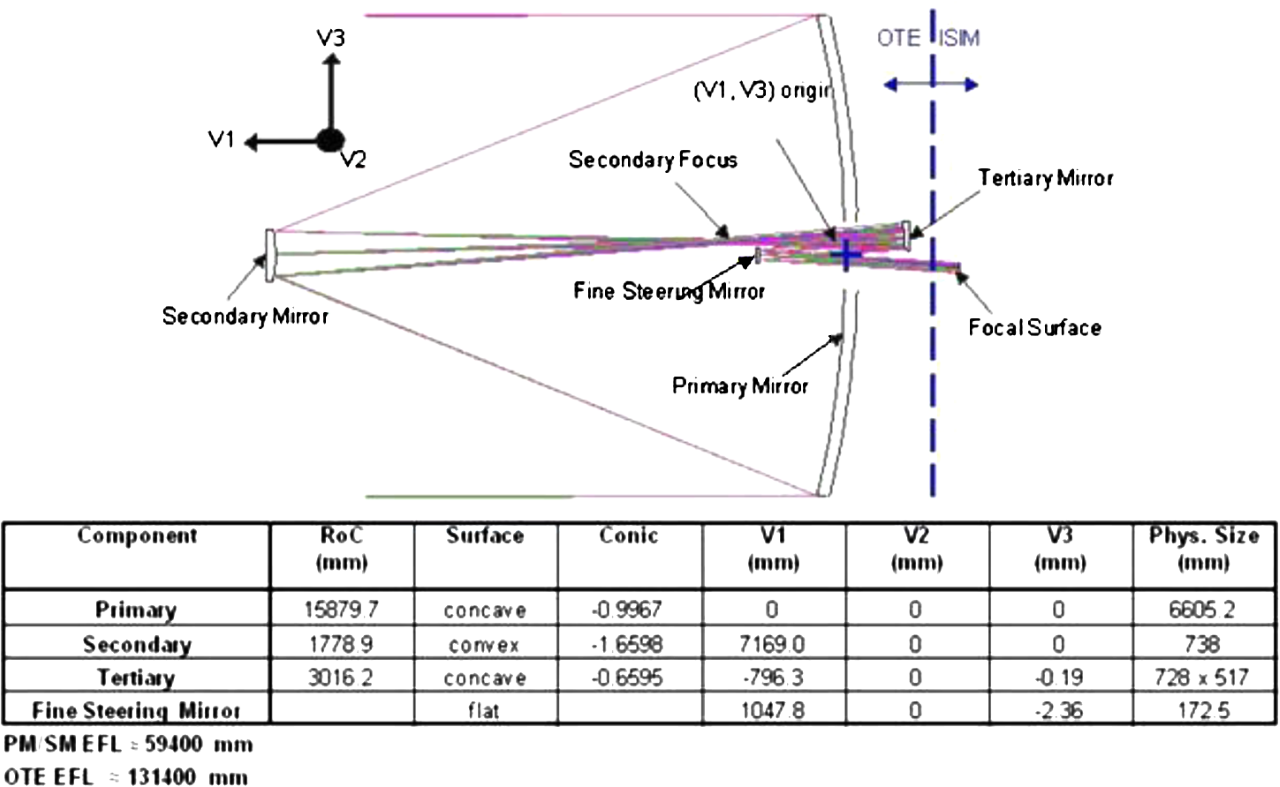

Paul A. Lightsey, Charles B. Atkinson, Mark C. Clampin, Lee D. Feinberg. *James Webb Space Telescope: large deployable cryogenic telescope in space*. Optical Engineering, 51(1), 011003 (2012). https://doi.org/10.1117/1.OE.51.1.011003

### Goal: Accurately model the JWST's optical system for objects within the observation range

In [1]:
%matplotlib widget

In [2]:
isdark = True

In [3]:
from rayoptics.environment import *

In [4]:
root_pth = Path(rayoptics.__file__).resolve().parent

In [5]:
opm = OpticalModel()
sm  = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model

In [6]:
pupil_diameter = 80.
pupil_radius = pupil_diameter/2
osp.pupil = PupilSpec(osp, key=['object', 'pupil'], value=pupil_diameter)

# single view
osp.field_of_view = FieldSpec(osp, key=['object', 'angle'], flds=[0.])

# wavelength: 550nm
osp.spectral_region = WvlSpec([(550.0, 1.0)], ref_wl=0)

In [7]:
sm.gaps[0].thi=1e+10

In [8]:
tertiary_mirror_perturb = srf.DecenterData('dec and return')
fs_mirror_perturb = srf.DecenterData('dec and return')

### Add optical surfaces

All distance measurements are in decimeters for ease of programming

#### Primary Mirror: 
- 18 segemented sections with a hole in the center for light to pass through.
- Concave elliptical paraboloid conic mirror.
- Radius of curvature: 158.789 decimeters (15.789 meters)
- Conic Constant: -0.9967
- Coordinates: (0, 0, 0)

In [9]:
opm.add_mirror(lbl='PRIMARY', r=-158.797, profile=Conic, cc=-0.9967, t=-71.69)

#### Secondary Mirror:
- Convex hyperbolic conic mirror.
- Radius of curvature: 17.789 decimeters (1.7789 meters)
- Conic Constant: 1.6598
- Coordinates: (-71.69, 0, 0)

In [10]:
opm.add_mirror(lbl='SECONDARY', r=-17.789, profile=Conic, cc=-1.6598, t=79.653)

#### Tertiary Mirror:
- Concave elliptical conic mirror.
- Radius of curvature: 30.162 decimeters (3.0162 meters)
- Conic Constant: -0.6595
- Coordinates: (7.963, 0, -0.0019)

In [11]:
opm.add_mirror(lbl='TERTIARY', r=-30.162, profile=Conic, cc=-0.6595, t=-18.441, decenter=tertiary_mirror_perturb, sd=pupil_diameter)

##### Apply tertiary mirror decenter

In [12]:
#tertiary_mirror_perturb.euler[0] = 6  # tilt tertiary mirror 6 mrad about the vertical axis
tertiary_mirror_perturb.dec[1] = -2

#### Fine Steering Mirror:
- Flat mirror.
- Radius of curvature: 0.0 decimeters (0.0 meters)
- Conic Constant: 0.00
- Coordinates: (1.0478, 0, 0.0236)

In [13]:
opm.add_mirror(lbl='FINE STEERING', profile=Conic, cc=0.00, t=30., decenter=fs_mirror_perturb)



#### Update Model

In [14]:
opm.update_model()

In [15]:
sm.list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1      0.0000
PRIMARY:    -0.006297     -71.6900       air    reflect -1      40.000
SECONDARY:    -0.056215      79.6530       air    reflect  1      3.9127
TERTIARY:    -0.033154     -18.4410       air    reflect -1      3.4557
FINE STEERING:     0.000000      30.0000       air    reflect  1      3.3619
  Img:     0.000000      0.00000                       1      6.4485


In [16]:
sm.list_sg()

               c               mode              type          y       alpha
                       t           medium
  Obj:      0.00000                 
                 1.00000e+10          air
PRIMARY:  -0.00629735          reflect
                    -71.6900          air
SECONDARY:   -0.0562145          reflect
                     79.6530          air
TERTIARY:   -0.0331543          reflect     dec and return    -2.0000     0.0000
                    -18.4410          air
FINE STEERING:      0.00000          reflect     dec and return     0.0000     0.0000
                     30.0000          air
  Img:      0.00000                 


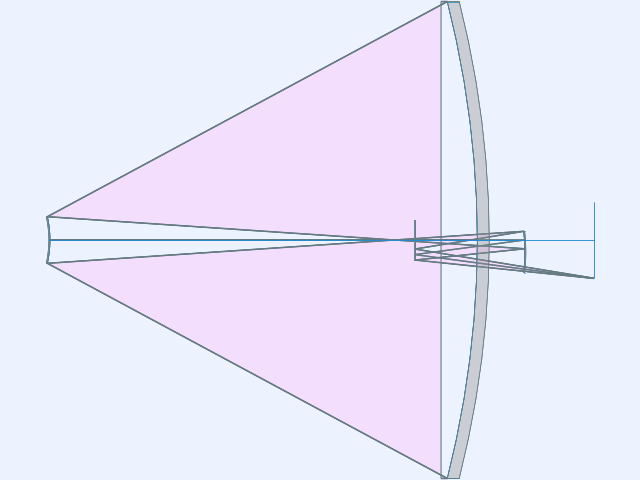

In [17]:
plt.ion()
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False).plot()

In [18]:
s3=sm.ifcs[3]
print(s3)

Surface(lbl='TERTIARY', profile=Conic(c=-0.03315430011272462, cc=-0.6595), interact_mode='reflect')


In [19]:
print(s3.decenter)

'dec and return': Decenter: array([ 0., -2.,  0.]), Tilt: array([0., 0., 0.])


In [20]:
print(tertiary_mirror_perturb)

'dec and return': Decenter: array([ 0., -2.,  0.]), Tilt: array([0., 0., 0.])


In [21]:
sm.list_gaps()

0 Gap(t=10000000000.0, medium=Air())
1 Gap(t=-71.69, medium=Air())
2 Gap(t=79.653, medium=Air())
3 Gap(t=-18.441, medium=Air())
4 Gap(t=30.0, medium=Air())


In [22]:
sm.list_decenters()

              thi    medium/mode          type          y       alpha
    0:  1.00000e+10          air
    1:     -71.6900          air
    2:      79.6530          air
    3:                   reflect  dec and return    -2.0000     0.0000
    3:     -18.4410          air
    4:                   reflect  dec and return     0.0000     0.0000
    4:      30.0000          air
    5:                     dummy


In [23]:
sm.list_surfaces()

0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1 Surface(lbl='PRIMARY', profile=Conic(c=-0.00629734818667859, cc=-0.9967), interact_mode='reflect')
2 Surface(lbl='SECONDARY', profile=Conic(c=-0.056214514587666534, cc=-1.6598), interact_mode='reflect')
3 Surface(lbl='TERTIARY', profile=Conic(c=-0.03315430011272462, cc=-0.6595), interact_mode='reflect')
4 Surface(lbl='FINE STEERING', profile=Conic(c=0.0, cc=0.0), interact_mode='reflect')
5 Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode='dummy')


In [24]:
print(sm.gbl_tfrms)

[(array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]), array([ 0.e+00,  0.e+00, -1.e+10])), (array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]), array([0., 0., 0.])), (array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]), array([  0.  ,   0.  , -71.69])), (array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]), array([ 0.   , -2.   ,  7.963])), (array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]), array([  0.   ,   0.   , -10.478])), (array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]]), array([ 0.   ,  0.   , 19.522]))]


### First order data

In [25]:
pm.first_order_data()

efl               -1328
ffl          -5.783e+04
pp1          -5.916e+04
bfl               30.28
ppk               -1358
f/#               -16.6
m             1.328e-07
red           7.529e+06
obj_dist          1e+10
obj_ang               1
enp_dist             -0
enp_radius           40
na obj            4e-09
n obj                 1
img_dist          30.28
img_ht           -23.18
exp_dist        0.05489
exp_radius       0.9186
na img           0.0301
n img                 1
optical invariant       0.6982


#### Spot Diagram for Flat Fine Steering Mirror

A spot diagram is used to determine the quality of the image projected on the optical sensor.
An ideal spot diagram should be a single dot at (0.00, 0.00)/

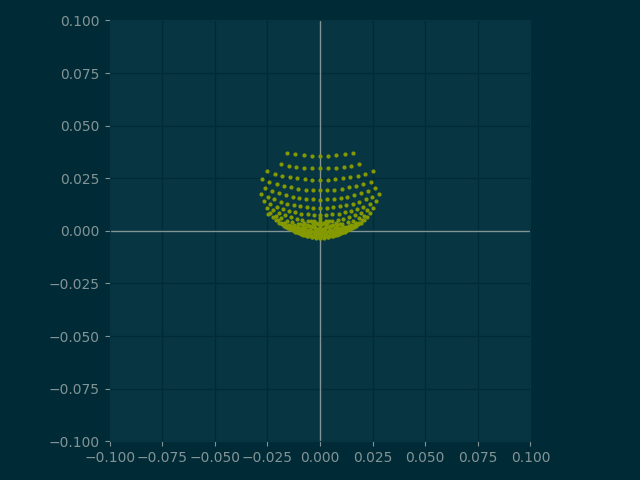

In [26]:
spot_plt = plt.figure(FigureClass=SpotDiagramFigure, opt_model=opm, scale_type=Fit.User_Scale,
                      user_scale_value=0.1, is_dark=isdark).plot()

Tilt fine steering mirror by 5 mrads about the y axis and replot spot diagram

In [27]:
fs_mirror_perturb.euler[0] -= 5
print(fs_mirror_perturb)

'dec and return': Decenter: array([0., 0., 0.]), Tilt: array([-5.,  0.,  0.])


In [28]:
opm.update_model()

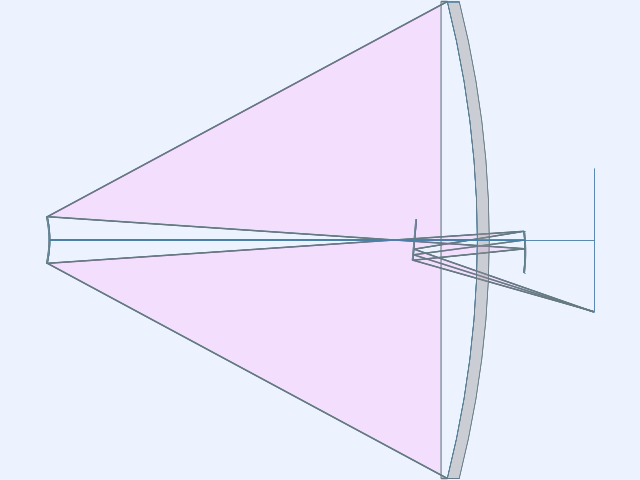

In [29]:
plt.ion()
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False).plot()

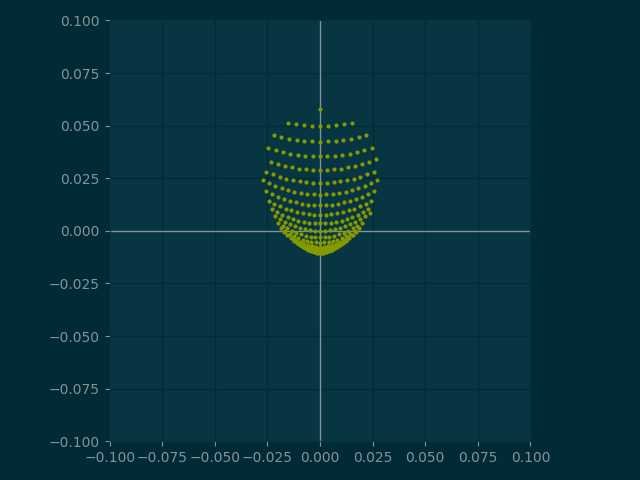

In [30]:
spot_plt = plt.figure(FigureClass=SpotDiagramFigure, opt_model=opm, scale_type=Fit.User_Scale,
                      user_scale_value=0.1, is_dark=isdark).plot()